<center>
    <h1 style="color:green">
        <b>
            <u> HOUSES PRICE PROJECT </u>
        </b>
    </h1>
</center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
#import statsmodels.api as smf


from src.data_processing.load_data import load_data
from src.data_processing.formatting_data import formatting
from config.config import TEST_RATIO, SEED 

In [2]:
print(TEST_RATIO, SEED)

0.3 13


# Introduction

# EDA

In [3]:
df = load_data('data/house_prices.csv')

df.head()

,price,AreA,bedrooms,BATHROOMS,stories,mainroad,guestroom,basement,hotwaterheating,air conditioning,parking,prefarea,furnishing STATUS,houSeaGe
0,4543000.0,4990.0,4.0,2.0,2.0,yes,yes,yes,no,no,0.0,yes,furnished,15.0
1,8080940.0,7000.0,3.0,2.0,4.0,yes,no,no,no,yes,2.0,no,FURNISHED,11.0
2,8750000.0,4321.0,3.0,2.0,2.0,yes,no,yes,yes,no,2.0,no,FURNISHED,NaN
3,1890000.0,1700.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,unfurnished,NaN
4,12215000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished,NaN


In [4]:
# Corrections on columns names and modalities names
formatting(df)
df.head()

,Price,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hot_Water_Heating,Air_Conditioning,Parking,Prefarea,Furnishing_Status,House_Age
0,4543000.0,4990.0,4.0,2.0,2.0,True,True,True,False,False,0.0,True,Furnished,15.0
1,8080940.0,7000.0,3.0,2.0,4.0,True,False,False,False,True,2.0,False,Furnished,11.0
2,8750000.0,4321.0,3.0,2.0,2.0,True,False,True,True,False,2.0,False,Furnished,NaN
3,1890000.0,1700.0,3.0,1.0,2.0,True,False,False,False,False,0.0,False,Unfurnished,NaN
4,12215000.0,7500.0,4.0,2.0,2.0,True,False,True,False,True,3.0,True,Furnished,NaN


drop duplicates sur les lignes

In [5]:
df.shape

(809, 14)

In [6]:
df.drop_duplicates(inplace = True)
df.shape

(809, 14)

## Univariate Analysis

c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


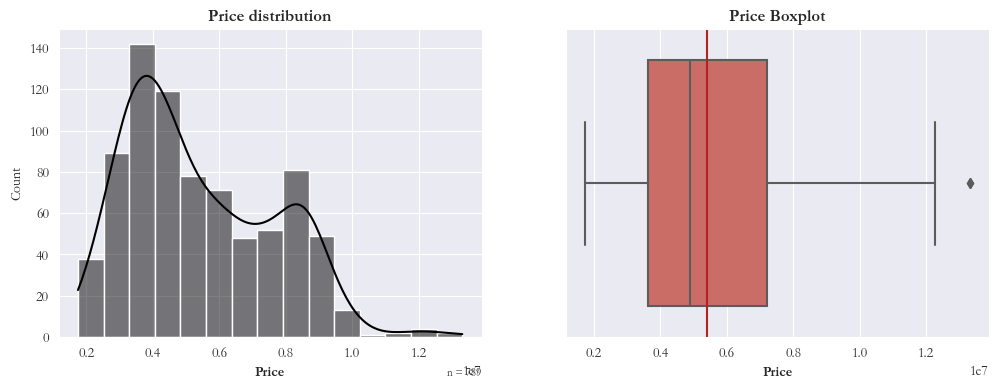

c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


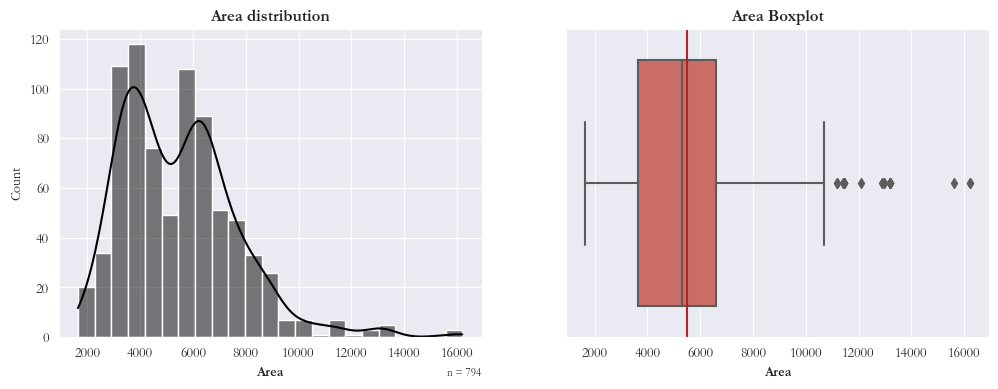

c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


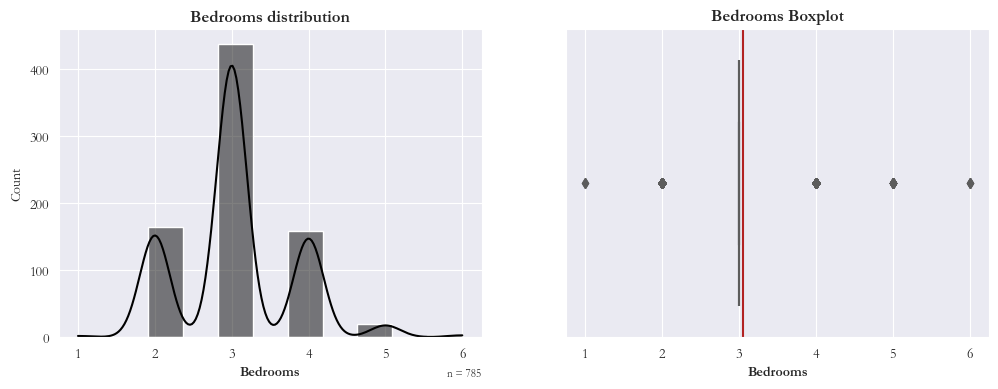

c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


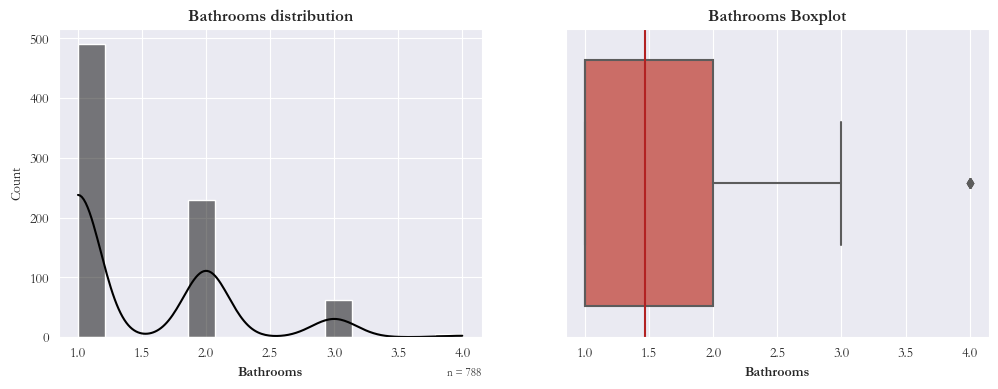

c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


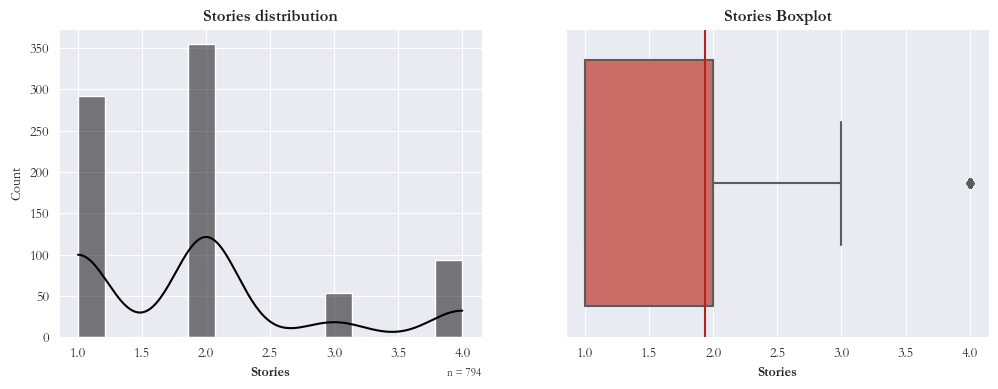

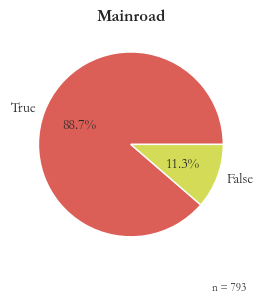

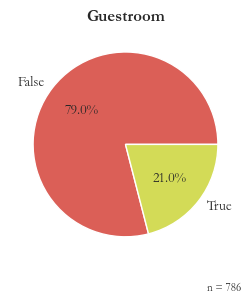

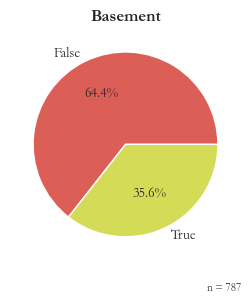

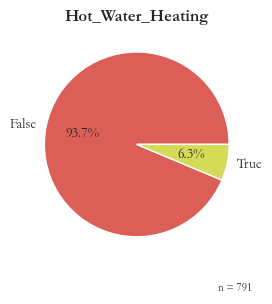

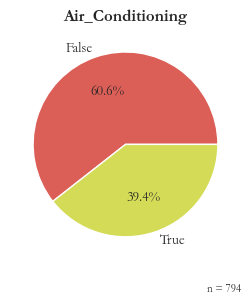

c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


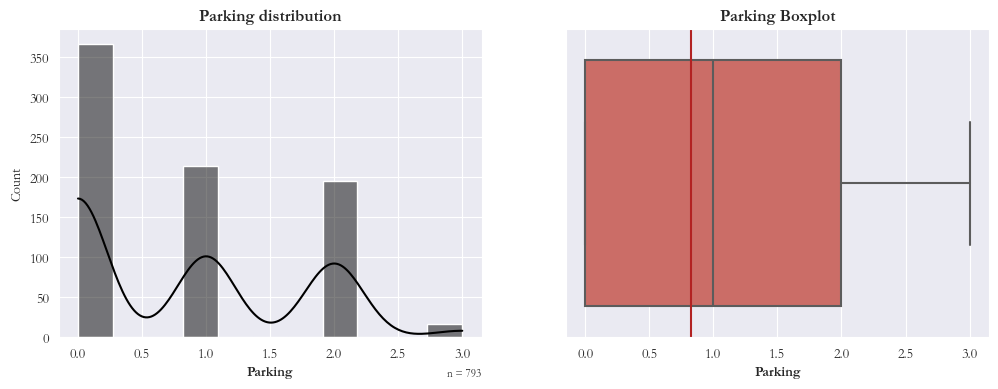

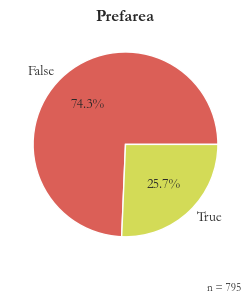

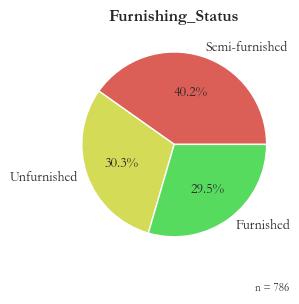

c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


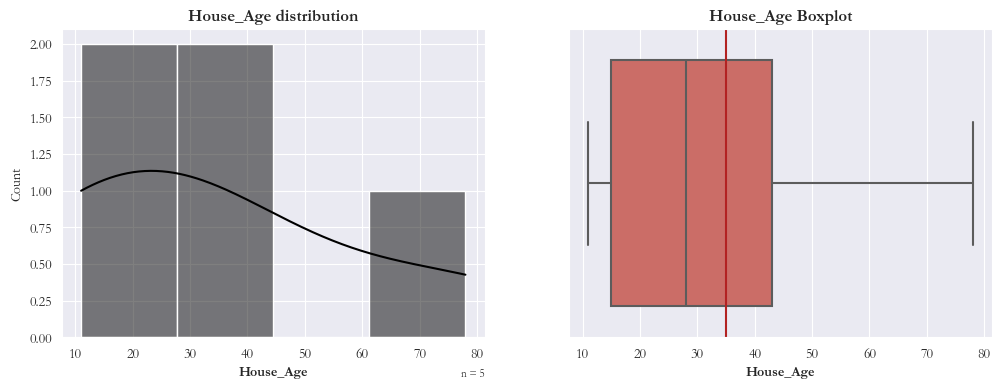

In [7]:
from src.figures.dataviz import dataviz_univariate

dataviz_univariate(df)

## Bivariate Analysis

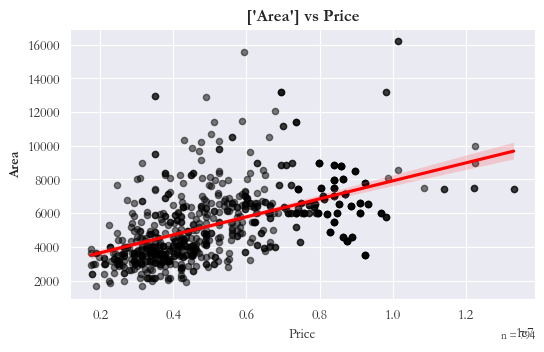

Pearson's correlation: 0.5268126754120181
P-value: 5.737673441674449e-59 



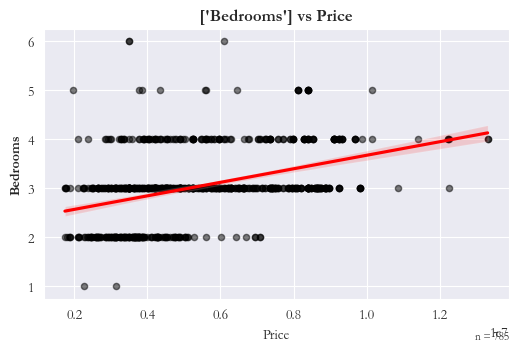

Pearson's correlation: 0.3949177560372359
P-value: 1.3692375994930548e-31 



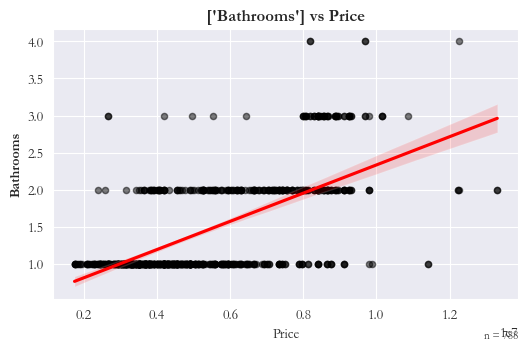

Pearson's correlation: 0.6124582220721573
P-value: 1.8557795978265e-84 



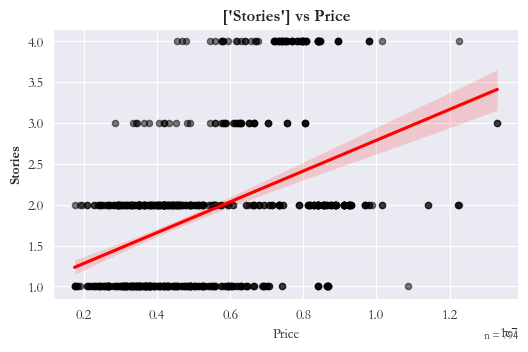

Pearson's correlation: 0.42651821822389646
P-value: 4.2620475047181195e-37 



c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


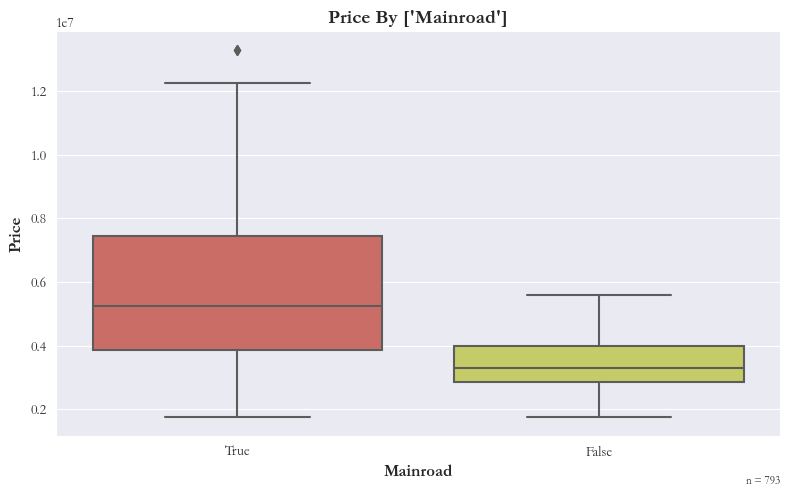

ANOVA Test, Price on ['Mainroad'] (H0: Same mean Price among modalities):
F-value = 92.522719
P-value = 0.000000


c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


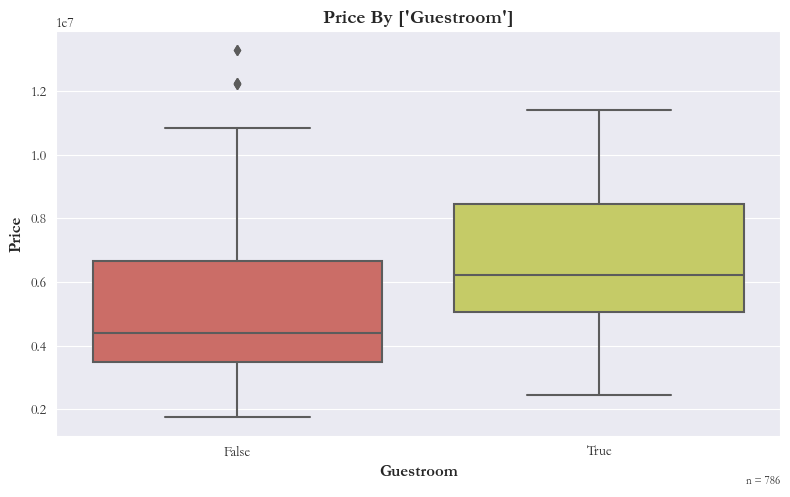

ANOVA Test, Price on ['Guestroom'] (H0: Same mean Price among modalities):
F-value = 62.366230
P-value = 0.000000


c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


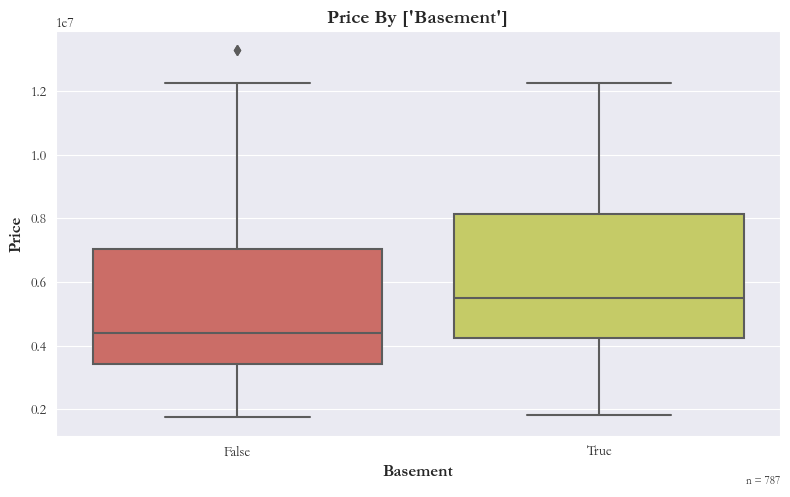

ANOVA Test, Price on ['Basement'] (H0: Same mean Price among modalities):
F-value = 26.391360
P-value = 0.000000


c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


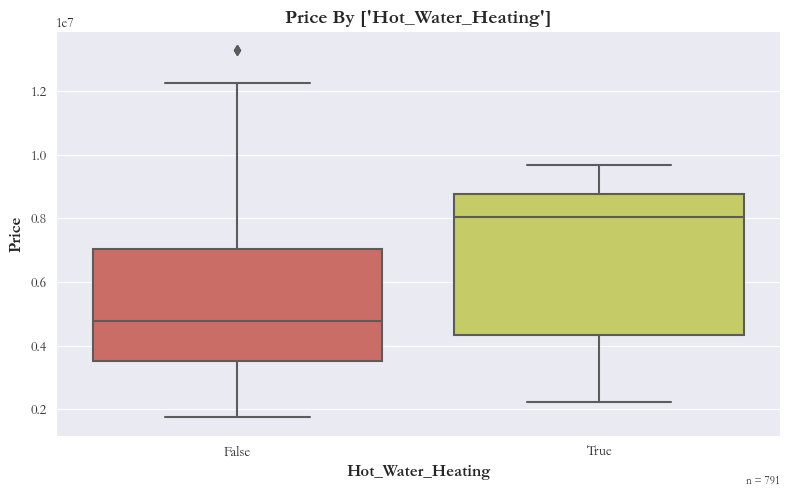

ANOVA Test, Price on ['Hot_Water_Heating'] (H0: Same mean Price among modalities):
F-value = 23.171560
P-value = 0.000002


c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


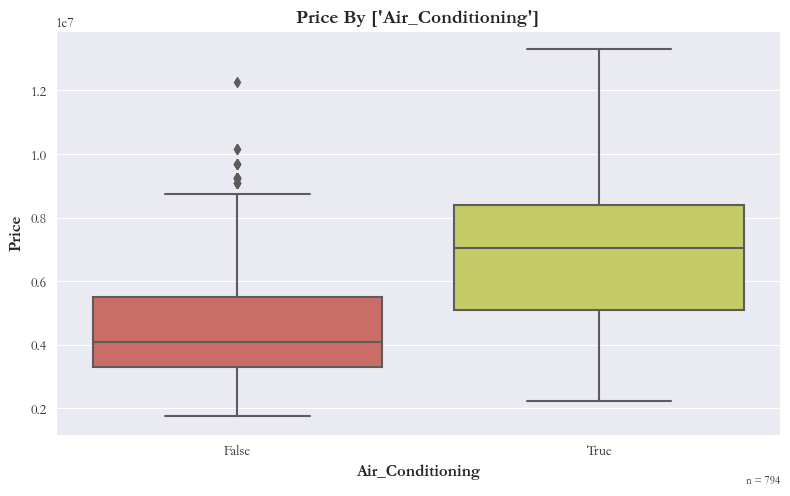

ANOVA Test, Price on ['Air_Conditioning'] (H0: Same mean Price among modalities):
F-value = 238.962393
P-value = 0.000000


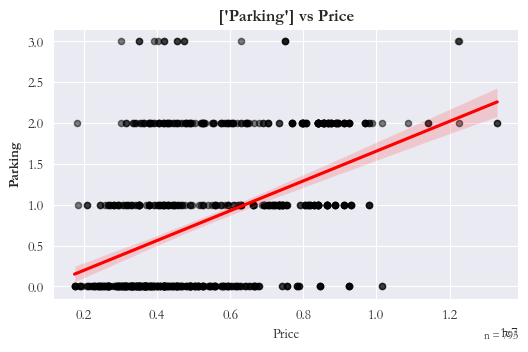

Pearson's correlation: 0.4490505877960571
P-value: 2.1368077039451456e-41 



c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


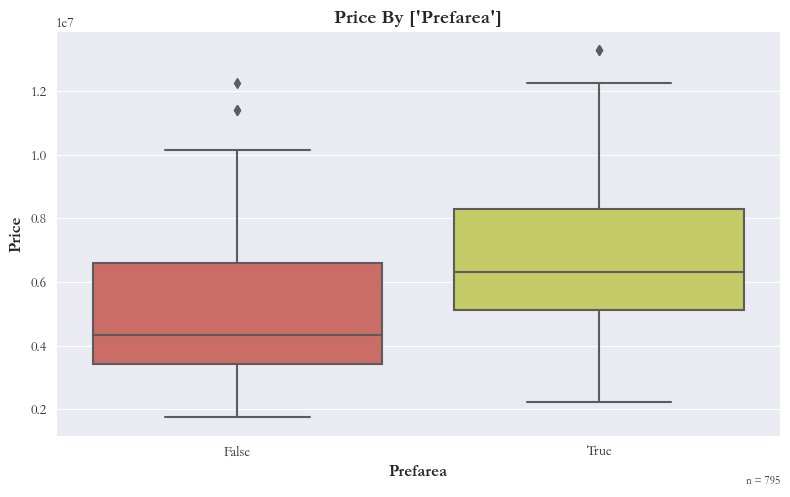

ANOVA Test, Price on ['Prefarea'] (H0: Same mean Price among modalities):
F-value = 80.021988
P-value = 0.000000


c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


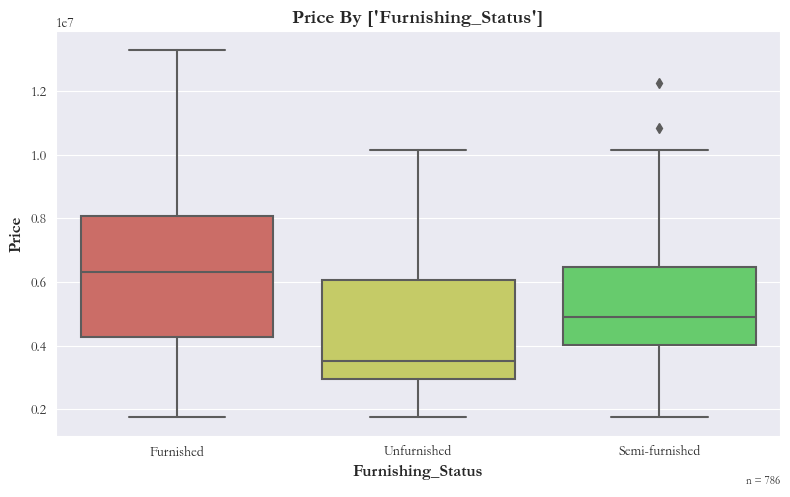

ANOVA Test, Price on ['Furnishing_Status'] (H0: Same mean Price among modalities):
F-value = 35.632226
P-value = 0.000000


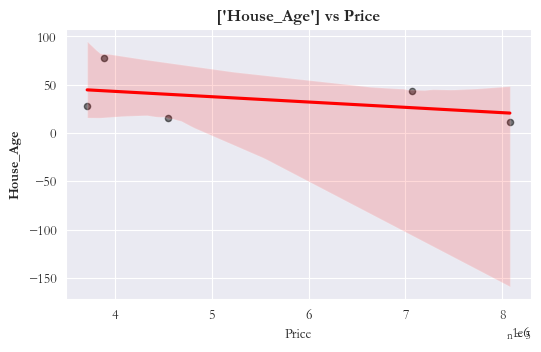

Pearson's correlation: -0.02416550695665219
P-value: 0.49247655837641874 



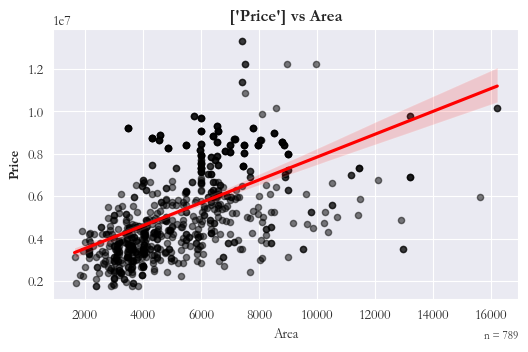

Pearson's correlation: 0.5268126754120181
P-value: 5.737673441674449e-59 



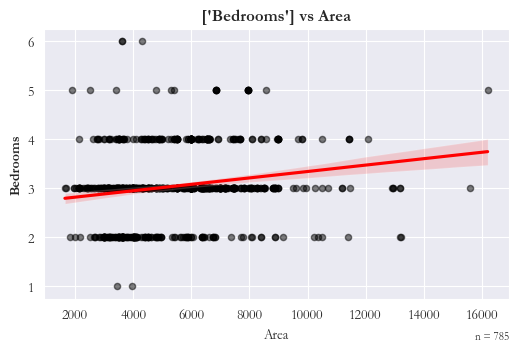

Pearson's correlation: 0.18200168713021736
P-value: 1.8656524007717931e-07 



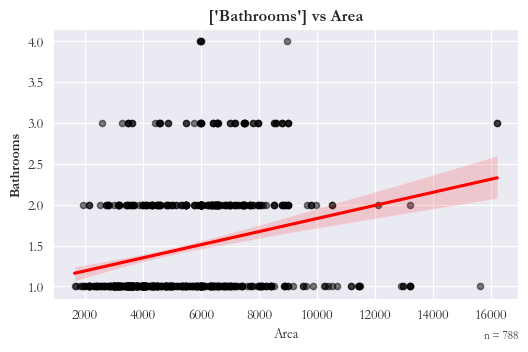

Pearson's correlation: 0.25907874052634416
P-value: 7.114388959327217e-14 



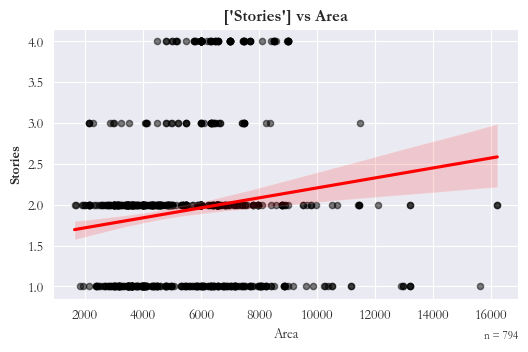

Pearson's correlation: 0.13876971186123152
P-value: 7.492193800460335e-05 



c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


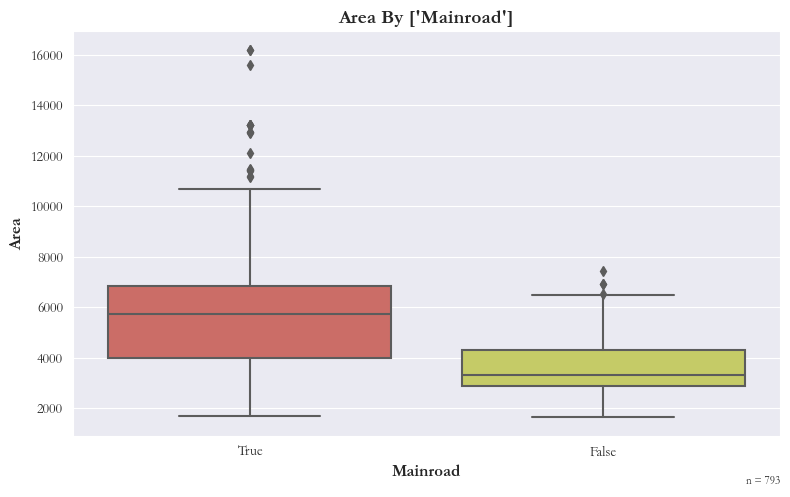

ANOVA Test, Area on ['Mainroad'] (H0: Same mean Area among modalities):
F-value = 78.562264
P-value = 0.000000


c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


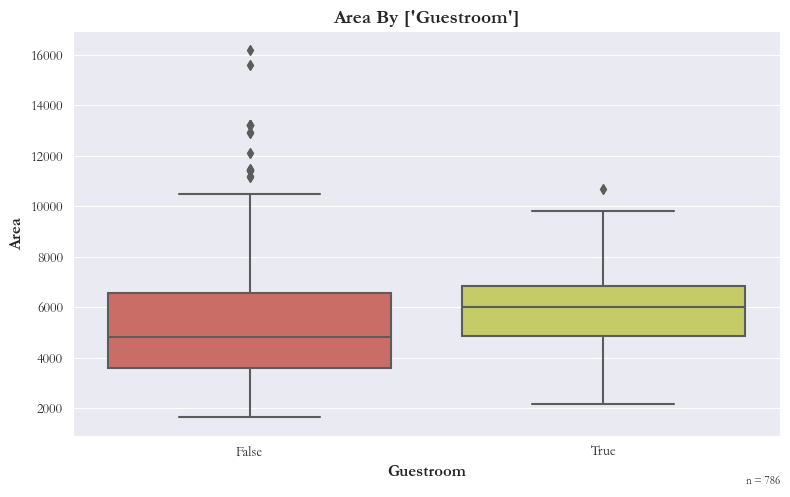

ANOVA Test, Area on ['Guestroom'] (H0: Same mean Area among modalities):
F-value = 13.166014
P-value = 0.000304


c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


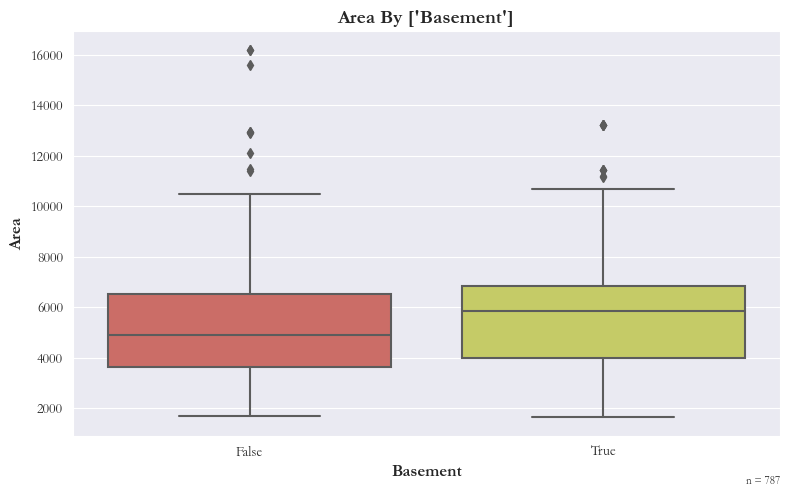

ANOVA Test, Area on ['Basement'] (H0: Same mean Area among modalities):
F-value = 2.322508
P-value = 0.127924


c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


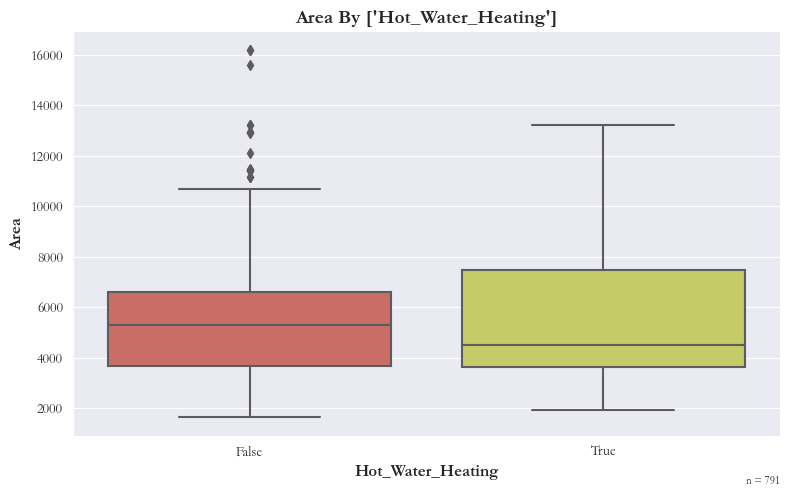

ANOVA Test, Area on ['Hot_Water_Heating'] (H0: Same mean Area among modalities):
F-value = 0.528111
P-value = 0.467621


c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


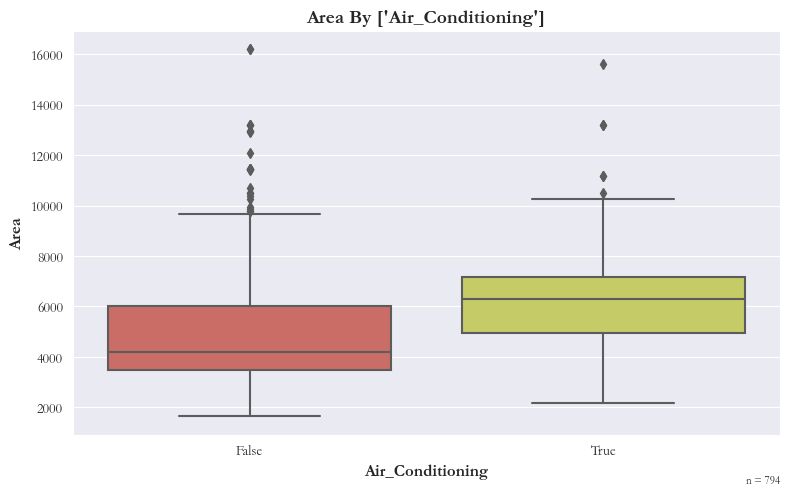

ANOVA Test, Area on ['Air_Conditioning'] (H0: Same mean Area among modalities):
F-value = 53.284031
P-value = 0.000000


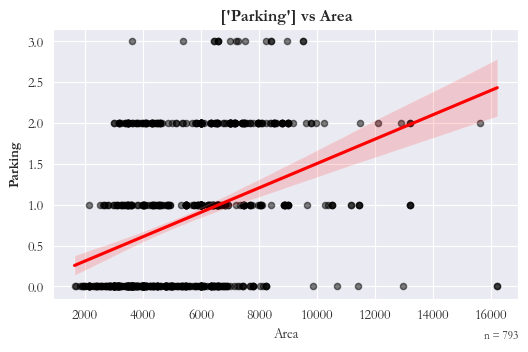

Pearson's correlation: 0.3696223817590977
P-value: 1.3634496809713124e-27 



c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


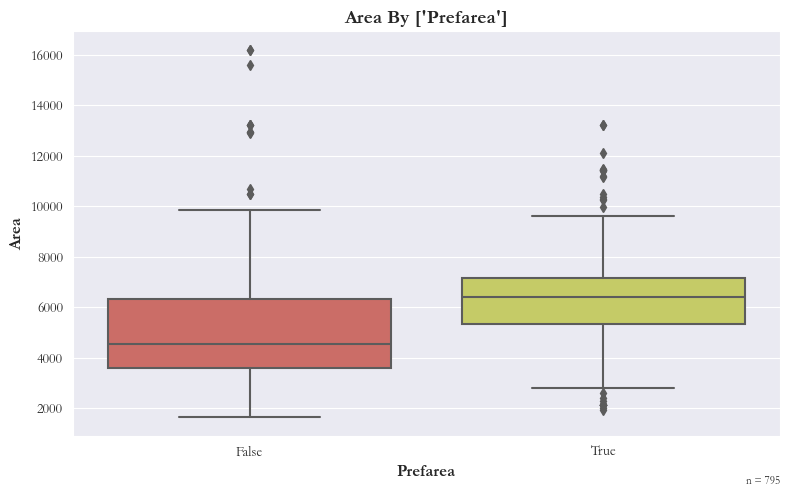

ANOVA Test, Area on ['Prefarea'] (H0: Same mean Area among modalities):
F-value = 37.927467
P-value = 0.000000


c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


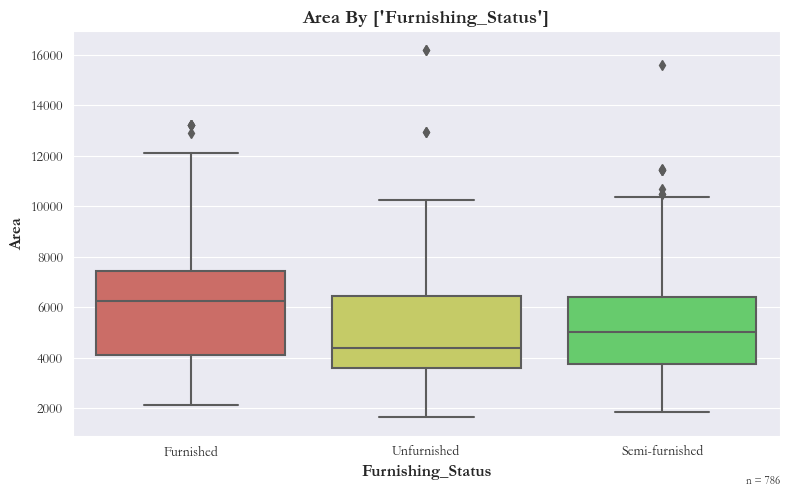

ANOVA Test, Area on ['Furnishing_Status'] (H0: Same mean Area among modalities):
F-value = 12.712023
P-value = 0.000004


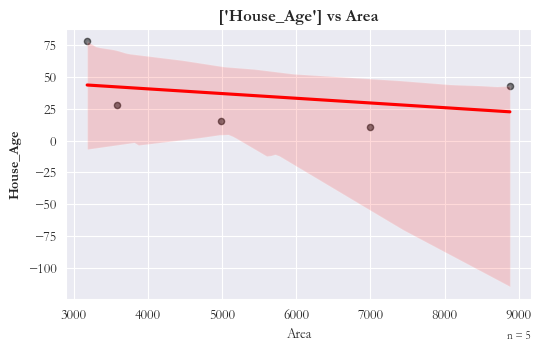

Pearson's correlation: -0.023847016554463737
P-value: 0.49819884260982605 



In [8]:
from src.figures.dataviz import dataviz_bivariate

dataviz_bivariate(df, "Price")
dataviz_bivariate(df, "Area")


c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\dython\nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\dython\nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


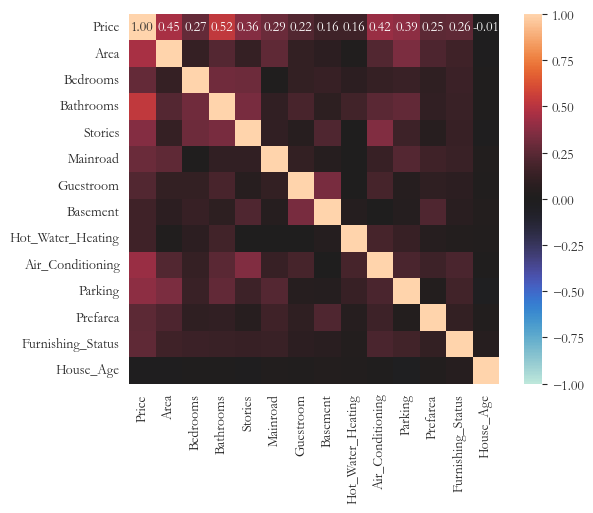

<Axes: >

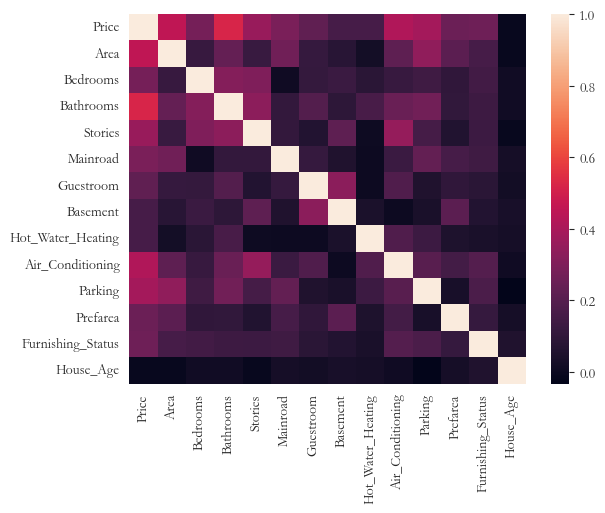

In [9]:
from dython.nominal import associations

sns.heatmap(associations(df)["corr"])

## Missing data

In [10]:
print("% of Na's by column : \n", df.isna().mean() * 100)

% of Na's by column : 
 Price                 2.472188
Area                  1.854141
Bedrooms              2.966625
Bathrooms             2.595797
Stories               1.854141
Mainroad              1.977750
Guestroom             2.843016
Basement              2.719407
Hot_Water_Heating     2.224969
Air_Conditioning      1.854141
Parking               1.977750
Prefarea              1.730532
Furnishing_Status     2.843016
House_Age            99.381953
dtype: float64


- It seems there is not enough information in the column "House_Age". Thus, we will simply remove the column.
- All others variables have some missing values, but a decent amount (< 3%)
- As the project's goal is to implement models to predict "Price", we decided we will not impute the missing values for "Price". It would be odd to predict the missing values and then to train the model with imputed data on the target variable, and moreover the reasonable amount of missing values allows us to do so. Then the lines where Price is NA will simply be removed from the DataFrame

In [11]:
# First filtering
df.drop(labels = ["House_Age"], axis=1, inplace = True, errors="ignore")        # dropping house_Age (Because 99% of Na)
df.dropna(subset=["Price"], inplace = True)     # dropping na's in Price. We won't impute our target variable

df.to_pickle("df.pkl")  # Exports the pre-imputation table in a file. Might be useful
print("# of na's just before imputation : \n", df.isna().sum())

# of na's just before imputation : 
 Price                 0
Area                 13
Bedrooms             21
Bathrooms            19
Stories              15
Mainroad             14
Guestroom            20
Basement             21
Hot_Water_Heating    17
Air_Conditioning     13
Parking              16
Prefarea             13
Furnishing_Status    20
dtype: int64


In [12]:
from src.data_processing.na_imputations import df_na_imputed


imputed_df = df_na_imputed(df, SEED = SEED)   # Impute all missing values. Adapted technique for each variable
print("# of na's after imputation : \n", imputed_df.isna().sum())

# of na's after imputation : 
 Price                0
Area                 0
Bedrooms             0
Bathrooms            0
Stories              0
Mainroad             0
Guestroom            0
Basement             0
Hot_Water_Heating    0
Air_Conditioning     0
Parking              0
Prefarea             0
Furnishing_Status    0
dtype: int64


The first variable we treated in the df_na_imputed() function is "Bedrooms". Analysing the distribution, it is fair to say it's like a normal distribution (but with integer numbers). We decided to impute the 21 missing values using a random normal distribution with the same mean and std as the initial distribution of "Bedrooms", and of course converting them into integers with a round function.
We are aware this method introduces randomness but at least it follows the initial distribution.

Here is a visualization of old (before imputation) and new distributions of "Bedrooms" :

c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

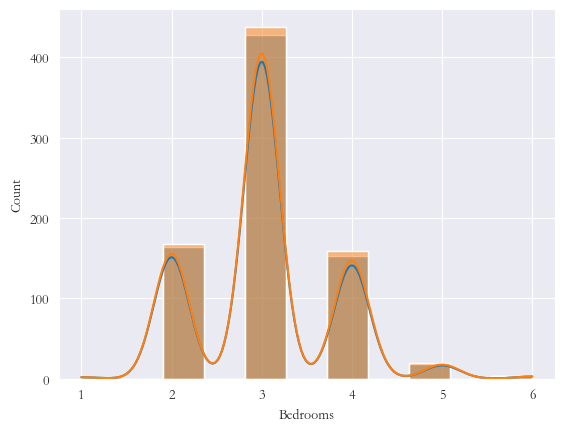

In [13]:
sns.set_palette("tab10")
sns.histplot(df["Bedrooms"], kde= True)
sns.histplot(imputed_df["Bedrooms"], kde= True)
plt.show()

In the next step, as we analyzed the distributions of all our qualitative variables, and as we needed a simple imputation method because there was still some na's in a lot of columns, the decision is done to use the mode for 4 variables.
- Stories and Bathrooms : we know it's not the smartest thing to do here, but it's simple and there are not much missing values. Moreover, we thought about the possibility to use random values following the actual proportions, but there is no evidence of the superiority of this method, it might even be worse. With the mode, the risk of error is more limited.
- Mainroad and Hot_Water_Heating : binary features with a really strong mode (89% and 94%). To use the mode here seems quite good, the chances of doing an error are low.

Here are old and new distributions :

In [14]:
sns.set_palette("tab10")
cols_to_mode_impute = ["Stories", "Bathrooms", "Mainroad", "Hot_Water_Heating"]

for col in cols_to_mode_impute:
    if df[col].dtype == "float64":
        sns.histplot(df[col], kde= True)
        sns.histplot(imputed_df[col], kde= True)
        plt.show()
    else :
        sns.histplot(df[col].astype("string"))
        sns.histplot(imputed_df[col].astype("string"))
        plt.show() 

'sns.set_palette("tab10")\ncols_to_mode_impute = ["Stories", "Bathrooms", "Mainroad", "Hot_Water_Heating"]\n\nfor col in cols_to_mode_impute:\n    if df[col].dtype == "float64":\n        sns.histplot(df[col], kde= True)\n        sns.histplot(imputed_df[col], kde= True)\n        plt.show()\n    else :\n        sns.histplot(df[col].astype("string"))\n        sns.histplot(imputed_df[col].astype("string"))\n        plt.show() '

To impute the numerical missing values of Area, it is a linear model featuring 8 regressors that give a good BIC criteria. The main problem was to deal with missing values into X_miss (matrix of regressors where Area is missing), but there was actually only one value missing. So we just put the mode of the global column at this place, in order to have model.predict(X_miss) working.

c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

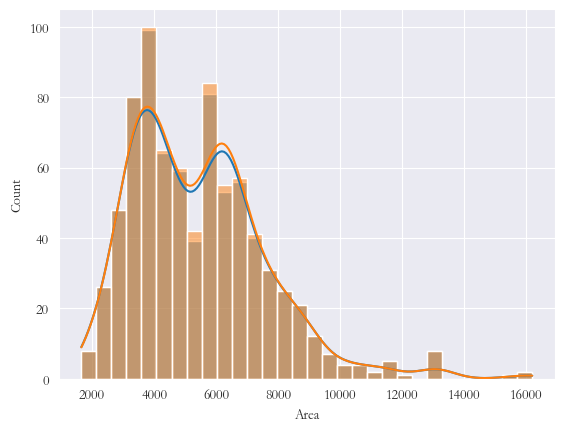

In [15]:
sns.histplot(df["Area"], bins = 30,  kde = True)
sns.histplot(imputed_df["Area"], bins = 30, kde = True)
plt.show()

For the rest of features (all qualitative), a Random Forest Classifier is applied. As this classifier does not handle missing values in training phase, we had to use already imputed regressors. List of regressors welcomes 1 new after each column imputation (see function code).

For the machine learning phase to come, we will need the variable Furnishing_Status to be one-hot encoded. Thus, to describe the furnishing status, we will have 3 binary variables instead of 1 categorical variable.

In [16]:
df_encoded = pd.get_dummies(imputed_df, columns=['Furnishing_Status'],prefix='',prefix_sep='')
df_encoded.head()

,Price,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hot_Water_Heating,Air_Conditioning,Parking,Prefarea,Furnished,Semi-furnished,Unfurnished
0,4543000.0,4990.0,4.0,2.0,2.0,True,True,True,False,False,0.0,True,True,False,False
1,8080940.0,7000.0,3.0,2.0,4.0,True,False,False,False,True,2.0,False,True,False,False
2,8750000.0,4321.0,3.0,2.0,2.0,True,False,True,True,False,2.0,False,True,False,False
3,1890000.0,1700.0,3.0,1.0,2.0,True,False,False,False,False,0.0,False,False,False,True
4,12215000.0,7500.0,4.0,2.0,2.0,True,False,True,False,True,3.0,True,True,False,False


In [17]:
df_encoded.to_pickle("data/df_ready.pkl")

# Validation croisée

# Machine Learning

## Baseline model

This model is quite simple to describe : Considering a house with x bedrooms, it will assign the average price of the houses which also have x bedrooms (from the training set).

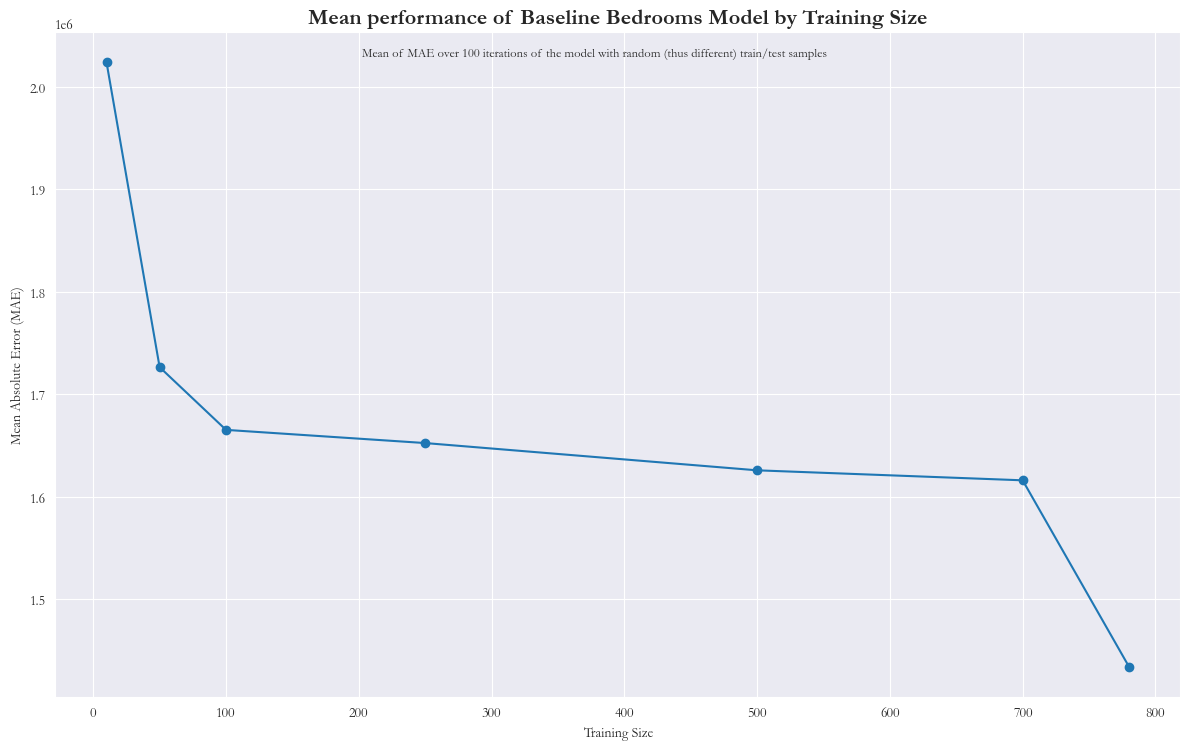

In [18]:
from src.data_science.baseline_model import *
from src.data_science.data import split_data

In the first place might be interested to see what is the impact, on the error of prediction, of the training size used to compute the mean Price by number of bedrooms. It is precisely what the function below does. If we perform the model just one time per training_size, we can get this kind of evolution for the error :

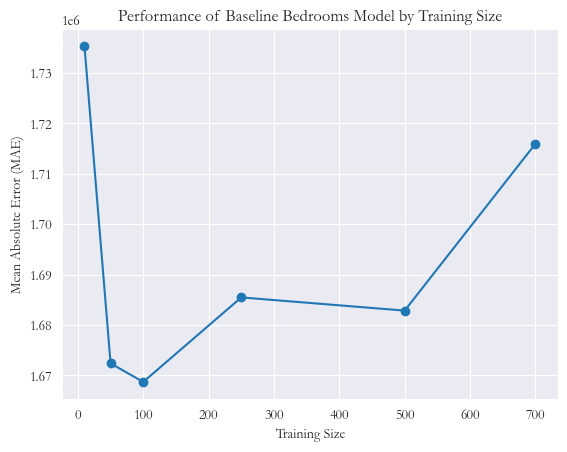

,train_size,mae
0,10,1.735381e+06
1,50,1.672361e+06
2,100,1.668688e+06
3,250,1.685463e+06
4,500,1.682843e+06
5,700,1.715943e+06


In [19]:
baseline_model(df_encoded, "Bedrooms", add_column= False)     
# add_column = False to keep df_encoded unchanged for the moment

But this depends actually a lot on the choice of the training and test examples. 

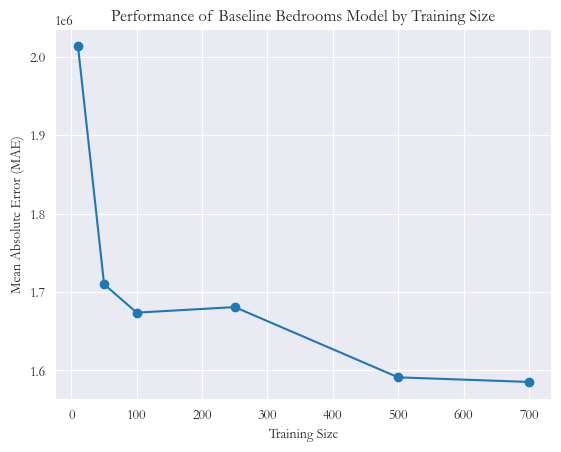

,train_size,mae
0,10,2.013785e+06
1,50,1.709798e+06
2,100,1.673592e+06
3,250,1.680690e+06
4,500,1.591064e+06
5,700,1.585231e+06


In [20]:
baseline_model(df_encoded, "Bedrooms", seed = 42, add_column = False)  #Changing the seed

To remove this hazard, we have to perform the model multiples times and see how it goes.

Here we implement 100 baseline models, the only changes between them is the sample selection when creating train and test sets ; for a training size of 50, each model (among 100 models) is associated to a train_set of 50 randomly drawed in df. Then we calculate the Mean Absolute Error of each model on its associated test_set, which measures the difference between actual price and the price predicted with the baseline bedrooms scheme. And eventuelly we compute the mean value of the 100 MAE's for this specific training size.

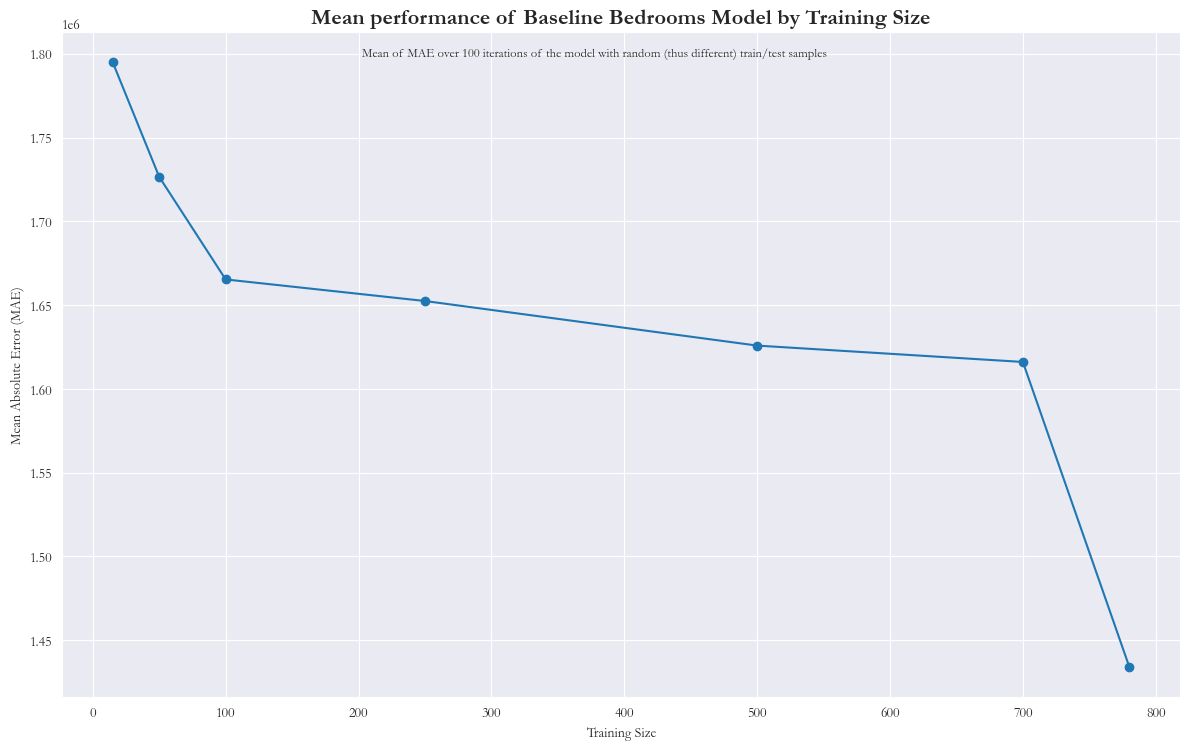

train_size
15     1.794889e+06
50     1.726491e+06
100    1.665304e+06
250    1.652437e+06
500    1.625829e+06
700    1.616065e+06
780    1.434331e+06
Name: mae, dtype: float64

In [21]:
baseline_model_n_times(100, df_encoded, "Bedrooms", train_sizes= [15, 50, 100, 250, 500, 700, 780])

Without any surprise, a larger training set gives better results on new data. That's why the best thing to do if we want the best baseline model will be to calculate the mean Prices over the whole dataset.
However, we won't really take into account the largest training size here (780 whereas we have 789 lines), because the test_set of 9 examples might be too small, and that's why we get a small mae value.

In [22]:
model = baseline_model(df_encoded, "Bedrooms", plot_mae = False, add_column = True)     # Adding prediction column into df
df_encoded.head()

,Price,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hot_Water_Heating,Air_Conditioning,Parking,Prefarea,Furnished,Semi-furnished,Unfurnished,Price_Baseline_Bedrooms
0,4543000.0,4990.0,4.0,2.0,2.0,True,True,True,False,False,0.0,True,True,False,False,6.506786e+06
1,8080940.0,7000.0,3.0,2.0,4.0,True,False,False,False,True,2.0,False,True,False,False,5.606690e+06
2,8750000.0,4321.0,3.0,2.0,2.0,True,False,True,True,False,2.0,False,True,False,False,5.606690e+06
3,1890000.0,1700.0,3.0,1.0,2.0,True,False,False,False,False,0.0,False,False,False,True,5.606690e+06
4,12215000.0,7500.0,4.0,2.0,2.0,True,False,True,False,True,3.0,True,True,False,False,6.506786e+06


c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

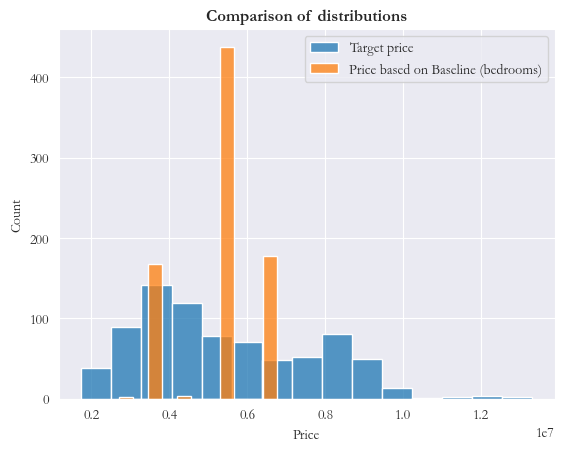

In [23]:
# Graphics

sns.histplot(df_encoded["Price"], label="Target price")
sns.histplot(df_encoded["Price_Baseline_Bedrooms"], label="Price based on Baseline (bedrooms)")
plt.title("Comparison of distributions", fontweight="bold")
plt.xlabel("Price")
plt.ylabel("Count")
plt.legend()
plt.show()

In [24]:
MAE_baseline = np.mean(np.abs(df_encoded["Price"] - df_encoded["Price_Baseline_Bedrooms"]))
print(MAE_baseline)

1632375.699814076


## Linear Model

In [25]:
from src.data_science.linear_model import *


The principle of this model is simple : Mathematically, it assumes a linear relationship between the features and the target variable (housing price):

#### Model Training

Training aims to find the best weights that minimize the prediction error, often measured by the RMSE (Root Mean Square Error).

#### RMSE (Root Mean Square Error)

The RMSE is a commonly used metric to evaluate the performance of a regression model. It calculates the square root of the average of the squared differences between predicted and actual values. A lower RMSE value indicates a better fit of the model to the data.

#### Model Usage

In this notebook, we will implement a concrete example of using a linear model for predicting prices on a real estate dataset, assessing its performance using the MAE and $R^2$ metrics.



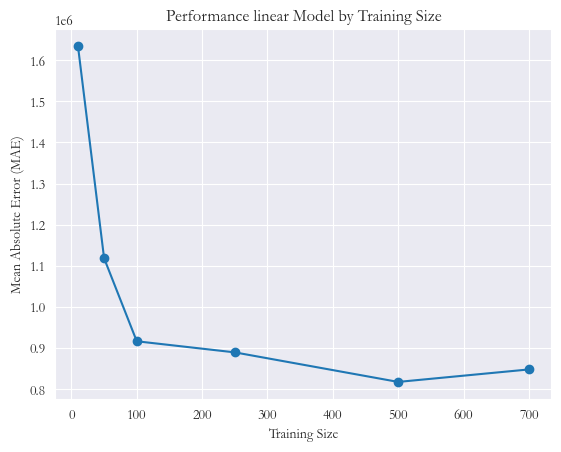

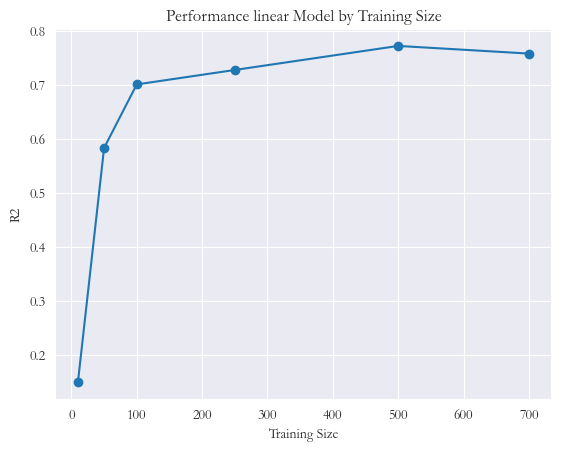

[   train_size           mae        R2
 0          10  1.634773e+06  0.149728
 1          50  1.118557e+06  0.583313
 2         100  9.165689e+05  0.701040
 3         250  8.895870e+05  0.727825
 4         500  8.177212e+05  0.772373
 5         700  8.480713e+05  0.758191,
 [LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()]]

In [26]:
df_encoded=df_encoded.drop("Price_Baseline_Bedrooms",axis=1)
linear_model(df_encoded,add_column=False)

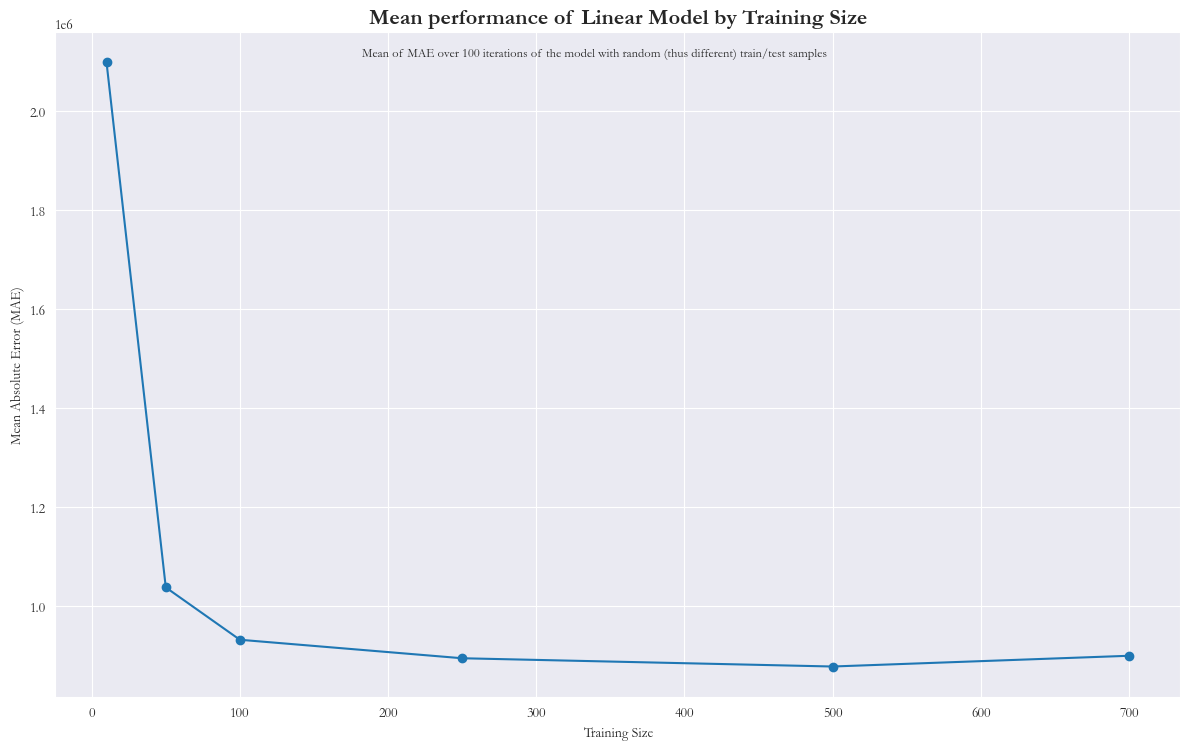

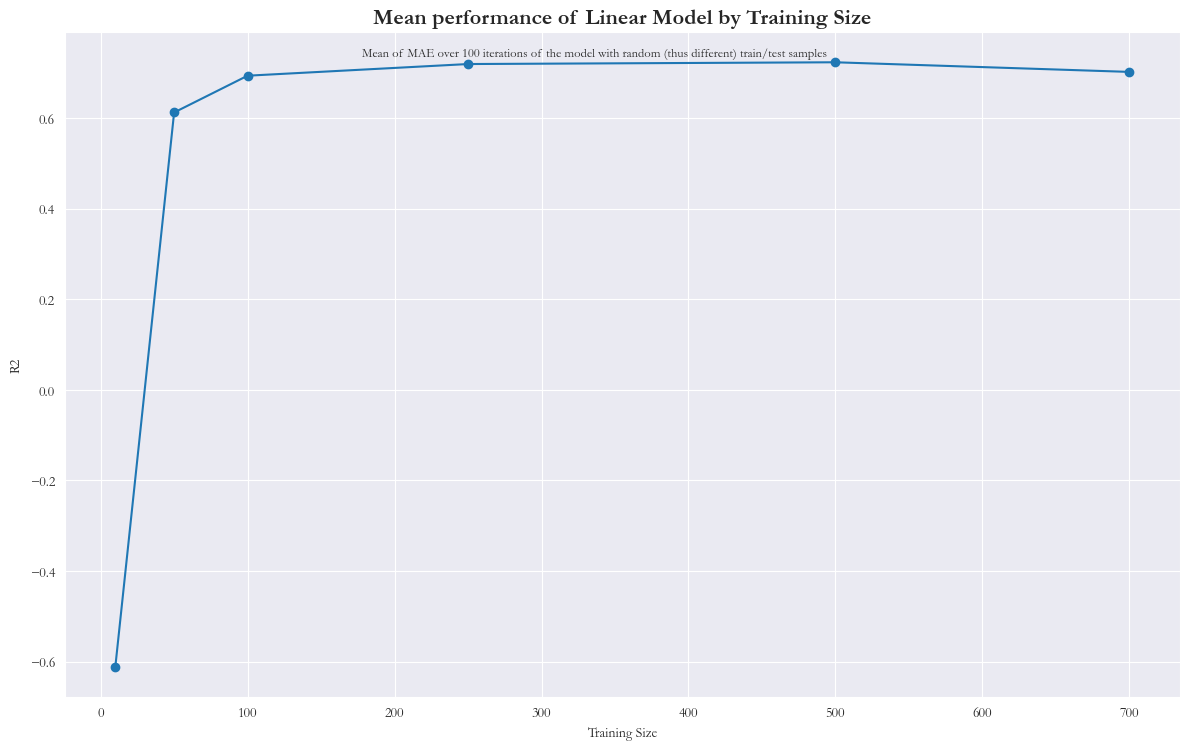

(train_size
 10     2.099388e+06
 50     1.037511e+06
 100    9.316971e+05
 250    8.943131e+05
 500    8.776036e+05
 700    8.993140e+05
 Name: mae, dtype: float64,
 train_size
 10    -0.610674
 50     0.612477
 100    0.693644
 250    0.719390
 500    0.723282
 700    0.702037
 Name: R2, dtype: float64)

In [27]:
linear_model_n_times(100, df_encoded)

In [28]:

errors, l_model =linear_model(df_encoded,train_sizes=[500],seed=52,plot_mae = False,plot_r2=False, add_column = True)    # Adding prediction column into df





c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\33612\anaconda3\envs\envprojet\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

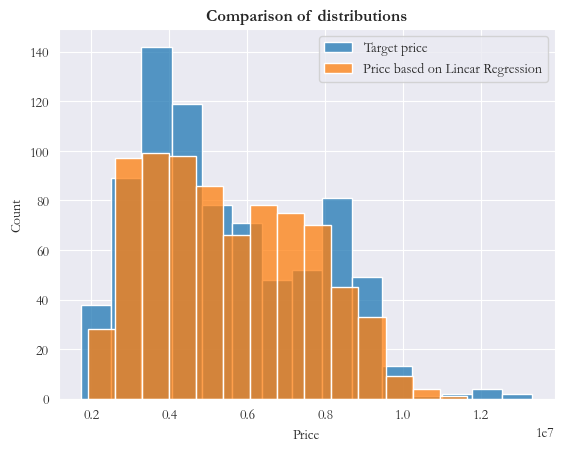

In [29]:
sns.histplot(df_encoded["Price"], label="Target price")
sns.histplot(df_encoded["Price_Linear_Regression"], label="Price based on Linear Regression")
plt.title("Comparison of distributions", fontweight="bold")
plt.xlabel("Price")
plt.ylabel("Count")
plt.legend()
plt.show()

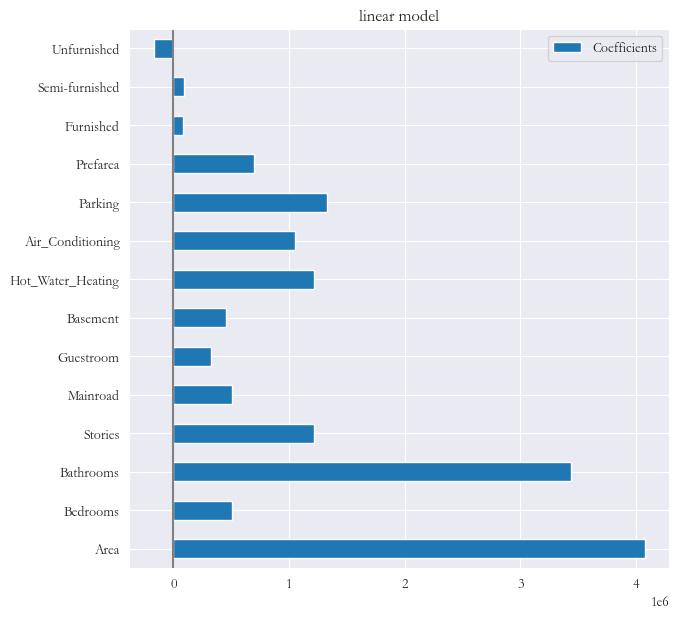

In [30]:
df_encoded=df_encoded.drop('Price_Linear_Regression',axis=1)

coefs = pd.DataFrame(
    l_model[0].coef_, columns=["Coefficients"], index= df_encoded.drop('Price',axis=1).columns
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("linear model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

The most important variable in this model are : Area, Bathrooms and Parking.

## Random Forest 

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
import ISLP
from ISLP.models import ModelSpec as MS
from sklearn.ensemble import \
     RandomForestRegressor as RF


ModuleNotFoundError: No module named 'ISLP'

In [ ]:
import pickle
from src.data_processing.load_data import load_data
from src.data_processing.formatting_data import formatting
from config.config import TEST_RATIO, SEED 

In [ ]:
df = df_encoded

model = MS(df.columns.drop('Price'), intercept=False)
D = model.fit_transform(df)
feature_names = list(D.columns)
X = np.asarray(D)

In [ ]:
(X_train,
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                df['Price'],
                                test_size=0.3,
                                random_state=0)

### Sur les données d'apprentissage 

Pour `max_depth` = 3 et `n_estimators` entre 100 et 500

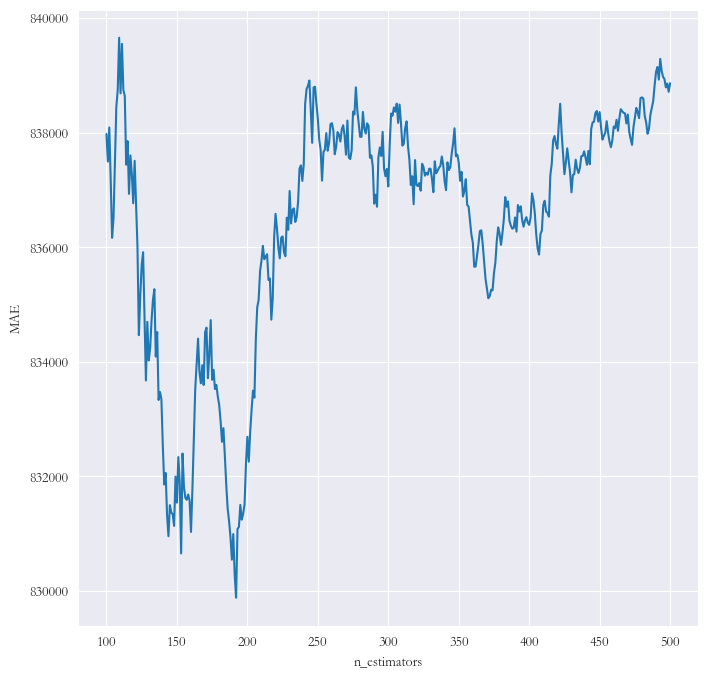

In [ ]:
n_estimators = np.arange(100,501,1)

mae = []

for i in n_estimators:
    RF_df = RF(max_features=4,
               random_state=0, max_depth=3, 
               n_estimators=i).fit(X_train, y_train)
    y_hat_RF = RF_df.predict(X_train)
    mae.append(np.mean(np.abs(y_train - y_hat_RF)))
    
ax = subplots(figsize=(8,8))[1]
ax.plot(n_estimators,mae)      
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.show()


In [ ]:
mae_df = pd.DataFrame({'mae': mae, 'n_estimators': n_estimators})

# Find the row with the minimum 'mae'
min_row = mae_df.loc[mae_df['mae'].idxmin()]

min_row['n_estimators']

192.0

Le minimum du `MAE` est atteint à `100` n_estimators

La MAE est de 838862.2475895298


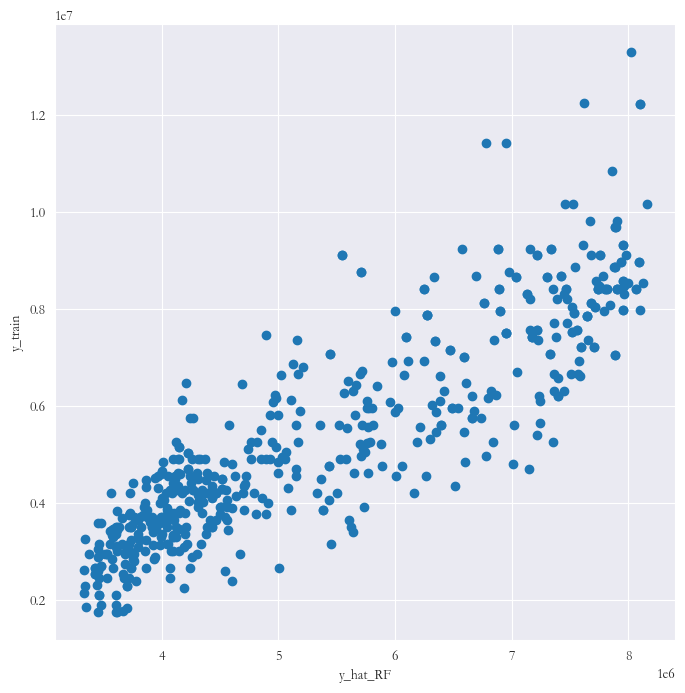

In [ ]:
ax = subplots(figsize=(8,8))[1]
y_hat_RF = RF_df.predict(X_train)
ax.scatter(y_hat_RF, y_train)
plt.xlabel('y_hat_RF')
plt.ylabel('y_train')
print(f'La MAE est de {np.mean(abs(y_train - y_hat_RF))}')

Pour `max_depth` = 6 et `n_estimators` entre 100 et 500

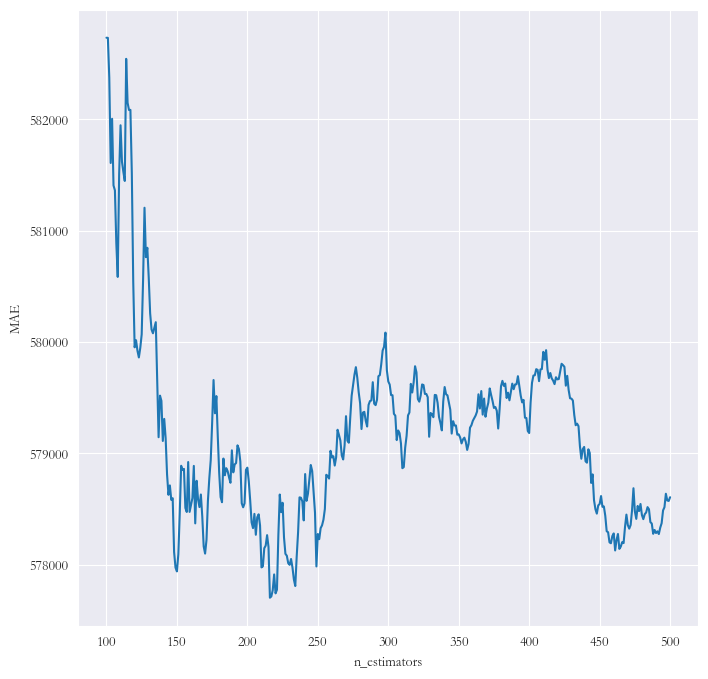

In [ ]:
n_estimators = np.arange(100,501,1)

mae = []

for i in n_estimators:
    RF_df = RF(max_features=4,
               random_state=0, max_depth=6, 
               n_estimators=i).fit(X_train, y_train)
    y_hat_RF = RF_df.predict(X_train)
    mae.append(np.mean(np.abs(y_train - y_hat_RF)))
    
ax = subplots(figsize=(8,8))[1]
ax.plot(n_estimators,mae)    
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.show()

In [ ]:
mae_df = pd.DataFrame({'mae': mae, 'n_estimators': n_estimators})

# Find the row with the minimum 'mae'
min_row = mae_df.loc[mae_df['mae'].idxmin()]

min_row['n_estimators']

216.0

Le minimum de la `MAE` est atteint à `171` n_estimators

La MAE est de 578605.6157225245


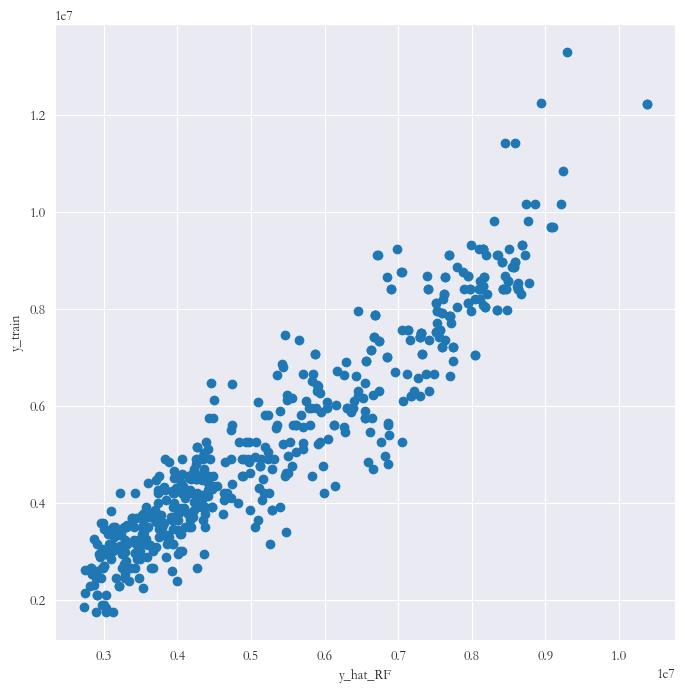

In [ ]:
ax = subplots(figsize=(8,8))[1]
y_hat_RF = RF_df.predict(X_train)
ax.scatter(y_hat_RF, y_train)
plt.xlabel('y_hat_RF')
plt.ylabel('y_train')
print(f'La MAE est de {np.mean(abs(y_train - y_hat_RF))}')

### Sur les données de test 

Pour `max_depth` = 3 et `n_estimators` entre 100 et 500

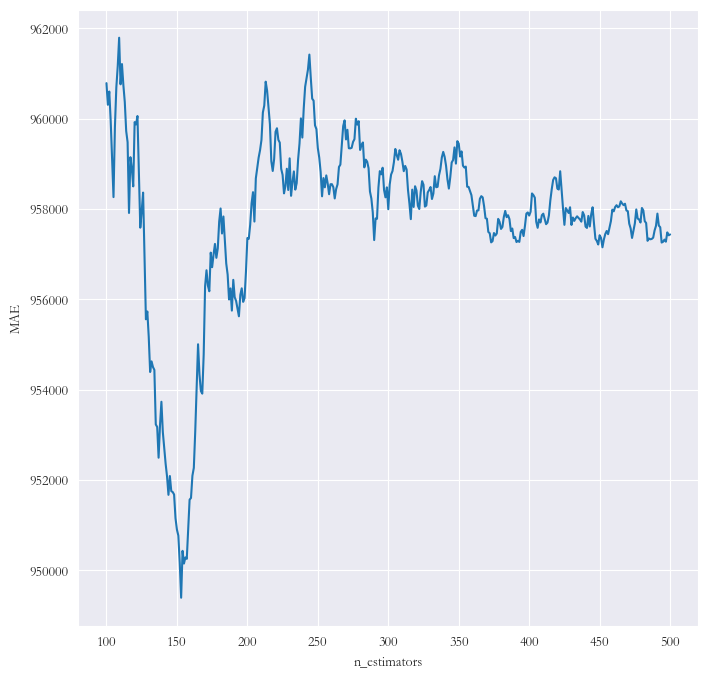

In [ ]:
n_estimators = np.arange(100,501,1)

mae = []

for i in n_estimators:
    RF_df = RF(max_features=4,
               random_state=0, max_depth=3, 
               n_estimators=i).fit(X_train, y_train)
    y_hat_RF = RF_df.predict(X_test)
    mae.append(np.mean(np.abs(y_test - y_hat_RF)))
    

ax = subplots(figsize=(8,8))[1]
ax.plot(n_estimators,mae)   
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.show()


In [ ]:
mae_df = pd.DataFrame({'mae': mae, 'n_estimators': n_estimators})

# Find the row with the minimum 'mae'
min_row = mae_df.loc[mae_df['mae'].idxmin()]

min_row['n_estimators']

153.0

Le minimum de la `MAE` est atteint à `499` n_estimators

La MAE est de 957437.7609553332


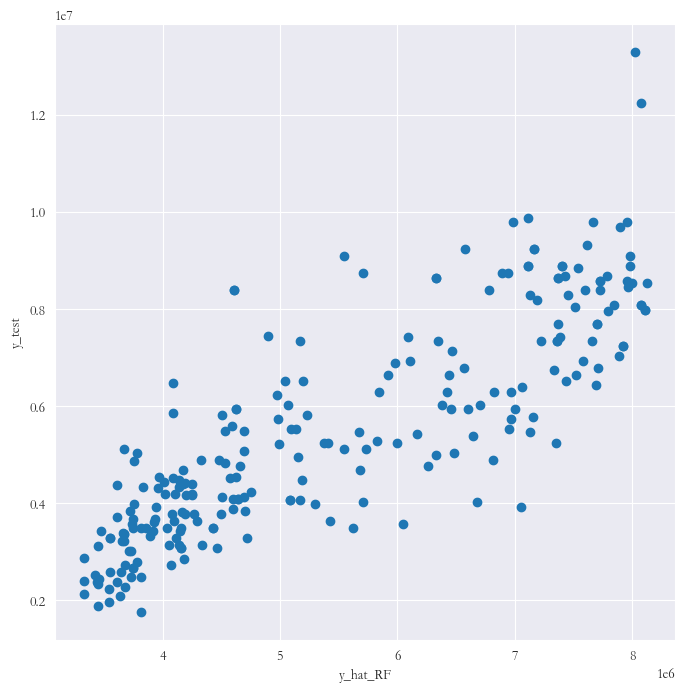

In [ ]:
ax = subplots(figsize=(8,8))[1]
y_hat_RF = RF_df.predict(X_test)
ax.scatter(y_hat_RF, y_test)
plt.xlabel('y_hat_RF')
plt.ylabel('y_test')
print(f'La MAE est de {np.mean(abs(y_test - y_hat_RF))}')

Pour `max_depth` = 6 et `n_estimators` entre 100 et 500

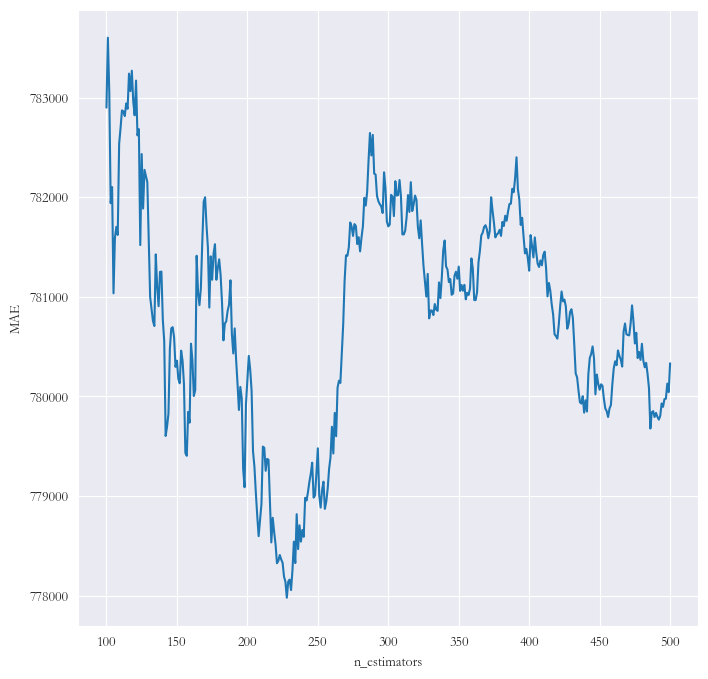

In [ ]:
n_estimators = np.arange(100,501,1)

mae = []

for i in n_estimators:
    RF_df = RF(max_features=4,
               random_state=0, max_depth=6, 
               n_estimators=i).fit(X_train, y_train)
    y_hat_RF = RF_df.predict(X_test)
    mae.append(np.mean(np.abs(y_test - y_hat_RF)))
    
ax = subplots(figsize=(8,8))[1]
ax.plot(n_estimators,mae)   
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.show()

In [ ]:
mae_df = pd.DataFrame({'mae': mae, 'n_estimators': n_estimators})

# Find the row with the minimum 'mae'
min_row = mae_df.loc[mae_df['mae'].idxmin()]

min_row['n_estimators']

228.0

Le minimum de la `MAE` est atteint à `495` n_estimators

La MAE est de 780332.7526695165


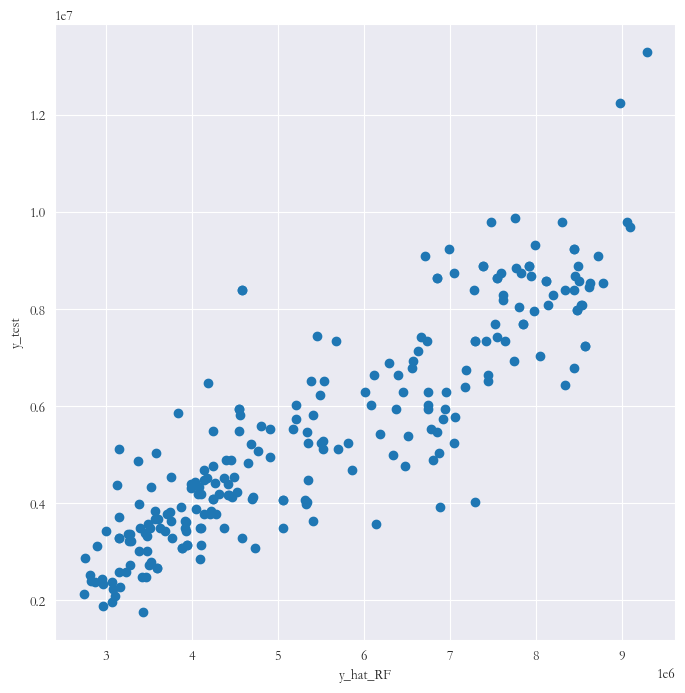

In [ ]:
ax = subplots(figsize=(8,8))[1]
y_hat_RF = RF_df.predict(X_test)
ax.scatter(y_hat_RF, y_test)
plt.xlabel('y_hat_RF')
plt.ylabel('y_test')
print(f'La MAE est de {np.mean(abs(y_test - y_hat_RF))}')

**Remarque**

On constate d'une façon générale que sur les données d'entraînement le minimum est plus vite atteint que sur les données de test, et que l'augmentation de `max_depth` augemente la performance du modèle (diminution de la MAE) sur les données d'apprentissage comme sur les données de test.

### Features Importances 

In [ ]:
feature_imp = pd.DataFrame(
    {'importance':RF_df.feature_importances_},
    index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

,importance
Price_Linear_Regression,0.386590
Area,0.178967
Bathrooms,0.159812
Air_Conditioning[True],0.056138
Stories,0.048339
Bedrooms,0.033008
Parking[2.0],0.023363
Prefarea[True],0.018412
Mainroad,0.017052
Unfurnished,0.016039


Les variables `Area, Bathrooms et Parking` sont celles qui ont le plus contribué à la prédiction du prix des maisons 

L'importance des features dans le cas des arbres de régression par Random Forest est calculée en enregistrant le montant total de la diminution du RSS (Erreur Quadratique Moyenne) résultant des divisions sur un prédicteur donné, en moyenne sur l'ensemble des B arbres.

# Conclusion